<a href="https://colab.research.google.com/github/DavideScassola/data_analysys_laboratory/blob/main/notebooks/efficientamento_energetico2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi Dati: Efficientamento Energetico
<img src="https://scontent-mxp2-1.xx.fbcdn.net/v/t39.30808-6/302095003_606466184289373_8672477649952855357_n.jpg?_nc_cat=110&ccb=1-7&_nc_sid=efb6e6&_nc_ohc=MDut0sWoOFAAX_XMGXN&_nc_ht=scontent-mxp2-1.xx&oh=00_AfBXEqmh42Af0IctMkI53eqPFbmQ2Xc92B0VW4avPrzfQA&oe=65C0CE00" width="700">

Abbiamo trovato [qui](https://search.r-project.org/CRAN/refmans/MPV/html/gasdata.html) dei dati riguardo al consumo di gas una casa, la cui descrizione è la seguente:

_"This data frame contains the average monthly volume of natural gas used in the furnace of a 1600 square foot house located in London, Ontario, for each month from 2006 until 2011. It also contains the average temperature for each month, and a measure of degree days. Insulation was added to the roof on one occasions, the walls were insulated on a second occasion, and the mid-efficiency furnace was replaced with a high-efficiency furnace on a third occasion."_

In [1]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Scarichiamo i dati e li mettiamo in un DataFrame
LINK_DATI = 'https://raw.githubusercontent.com/DavideScassola/data_analysys_laboratory/main/notebooks/dati/gasdata.csv'
df = pd.read_csv(LINK_DATI)

In [3]:
df

,month,cubicmetres,dailyusage,temp,year,roof_insulation,wall_insulation,high_efficiency_furnace
0,July,27.9,0.9,18.0,2005,0,0,0
1,August,18.6,0.6,17.0,2005,0,0,0
2,September,22.4,0.7,17.0,2005,0,0,0
3,October,153.6,4.8,12.0,2005,0,0,0
4,November,316.1,10.9,6.0,2005,0,0,0
...,...,...,...,...,...,...,...,...
65,December,361.5,11.3,-2.0,2010,1,1,1
66,January,423.1,13.6,-6.0,2011,1,1,1
67,February,449.9,15.5,-7.0,2011,1,1,1
68,March,376.4,11.8,-2.0,2011,1,1,1


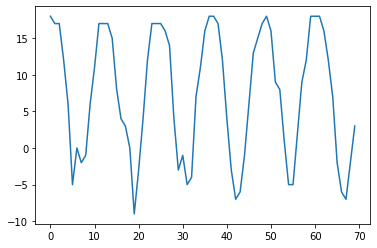

In [4]:
plt.plot(df['temp'])

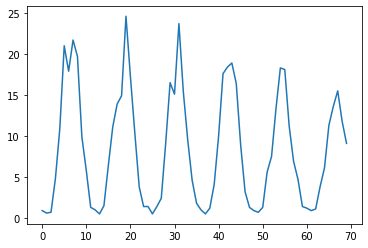

In [5]:
plt.plot(df['dailyusage'])

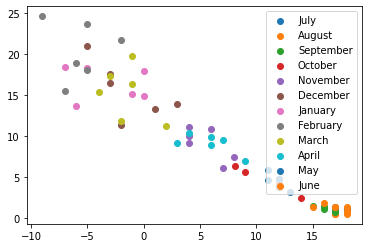

In [6]:
for m in df['month'].unique():
    df_m = df[df['month'] == m]
    plt.scatter(df_m['temp'], df_m['dailyusage'], label=m)
    
_ = plt.legend()

In [7]:
df['energy_efficiency'] = df['roof_insulation'] + df['wall_insulation'] + df['high_efficiency_furnace']

La tabella sembra corrispondere alla descrizione:
- Ogni riga contiene delle misurazioni riguardanti un certo mese dell'anno, apparentemente da Luglio 2005 ad Aprile 2011. In totale abbiamo 70 righe (osservazioni)
- Per ogni mese sappiamo il consumo totale di gas in metri cubi (*cubicmetres*), la media giornaliera (*dailyusage*) e la temperatura media esterna (*temp*)
- Le ultime 3 colonne invece ci dicono che tipo di intervento di efficientamento energetico è stato fatto (*roof_insulation*, *wall_insulation*, *high_efficiency_furnace*). Queste colonne non contengono veramente dei numeri, hanno solo due opzioni: '0' e '1' che indicano se la casa ha (1) o no (0) la caratteristica indicata dalla colonna. 

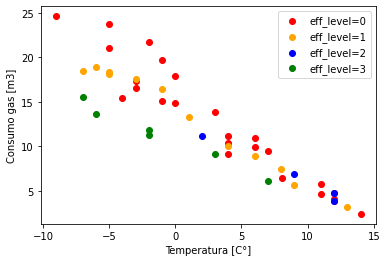

In [20]:
colors = ['red', 'orange', 'blue', 'green']

for i in (0, 1, 2, 3):
    df_i = df[df['energy_efficiency'] == i]
    plt.scatter(df_i['temp'], df_i['dailyusage'], label=f'eff_level={i}', color=colors[i])
plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [m3]')
_ = plt.legend()

Coefficiente (m): -0.79
Intercetta (h): 14.21
R_squared: 0.93


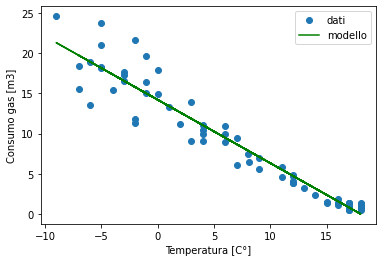

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=df[['temp']],
          y=df['dailyusage'])

print(f'Coefficiente (m): {model.coef_[0]:.2f}')
print(f'Intercetta (h): {model.intercept_:.2f}')

r_squared = model.score(df[['temp']], df['dailyusage'])
print(f'R_squared: {r_squared:.2f}')

plt.plot(df['temp'], df['dailyusage'], 'o', label='dati')
plt.plot(df['temp'], model.predict(df[['temp']]), '-', color='green', label='modello')
plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [m3]')
_ = plt.legend()

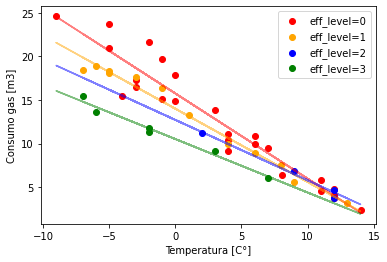

In [22]:
# Possiamo scartare i dati con temperatura maggiore di 15°C
df = df[df['temp']<15]

colors = ['red', 'orange', 'blue', 'green']
models = []

for i in range(df['energy_efficiency'].max()+1):
    X = df[df['temp']<15]
    X = df[['temp']][df['energy_efficiency']==i].copy()
    y = df['dailyusage'][df['energy_efficiency']==i].copy()
    model = LinearRegression()
    model.fit(X, y)
    plt.scatter(X['temp'], y, label=f'eff_level={i}', color=colors[i])
    plt.plot(df['temp'], model.predict(df[['temp']]), color=colors[i], alpha=0.5)
    models.append(model)


plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [m3]')
_ = plt.legend()

In [38]:
model_no_efficientamento = models[0]
model_max_efficientamento = models[-1]

def differenza_consumo(X):
    return model_no_efficientamento.predict(X[['temp']]) - model_max_efficientamento.predict(X[['temp']])

def consumo_relativo(X):
    return model_max_efficientamento.predict(X[['temp']]) / model_no_efficientamento.predict(X[['temp']])

In [70]:
X = pd.DataFrame({'temp': range(-10, 15, 1)})

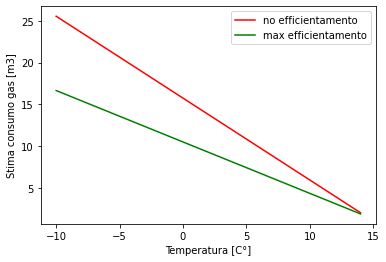

In [71]:
plt.plot(X['temp'], model_no_efficientamento.predict(X), color='red', label='no efficientamento')
plt.plot(X['temp'], model_max_efficientamento.predict(X), color='green', label='max efficientamento')
plt.xlabel('Temperatura [C°]')
plt.ylabel('Stima consumo gas [m3]')
plt.legend()

Text(0, 0.5, 'Differenza consumo gas [m3]')

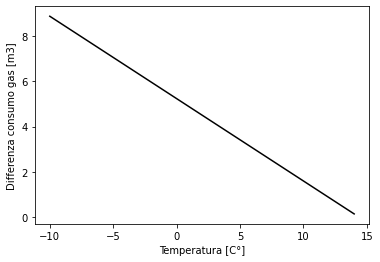

In [72]:
plt.plot(X['temp'], differenza_consumo(X), color='black')
plt.xlabel('Temperatura [C°]')
plt.ylabel('Differenza consumo gas [m3]')

Text(0, 0.5, 'Consumo relativo gas')

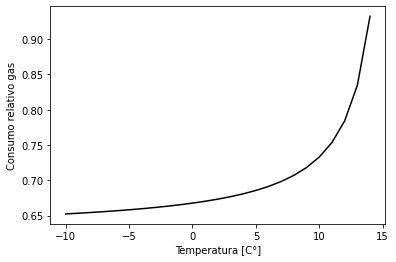

In [73]:
plt.plot(X['temp'], consumo_relativo(X), color='black')
plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo relativo gas')